# Einstein ring (grav. lensing project validation test)

This notebook is to perform initial tests and to learn how to implement the lensing algorithm

## 1) Set up source and image planes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = np.zeros((101, 101), dtype=np.float64)
src[50][50]=1

img = np.zeros((101, 101), dtype=np.float64)

In [3]:
src

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, 'Image plane')

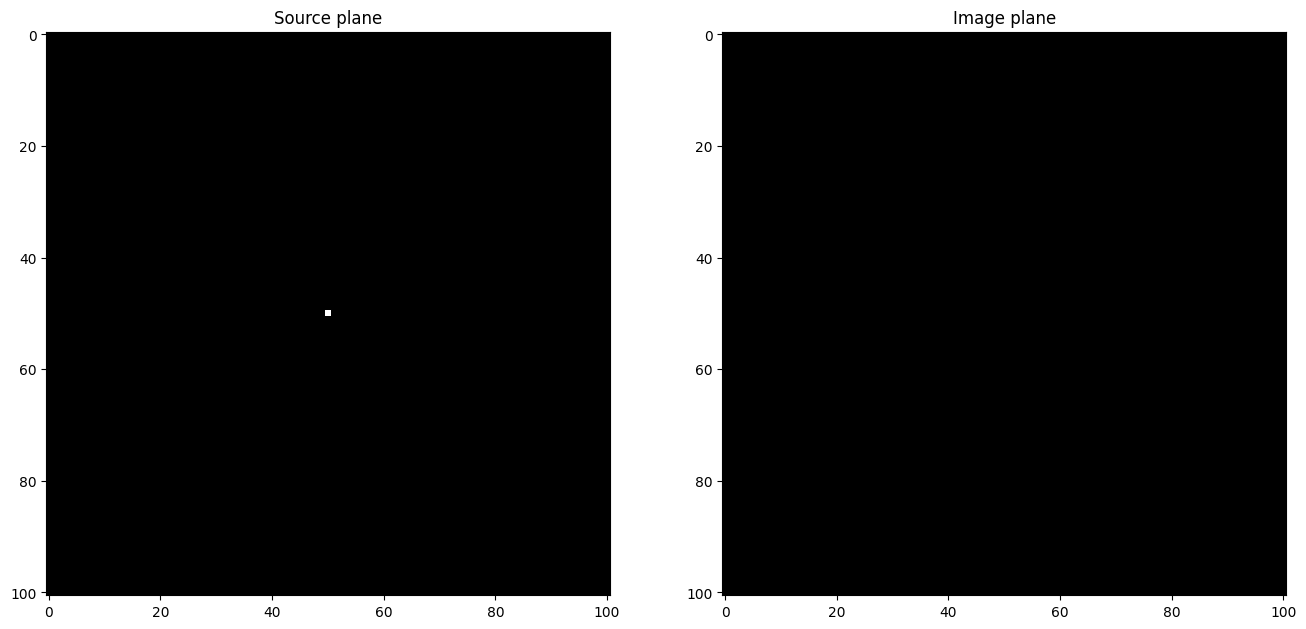

In [4]:
fig = plt.figure(figsize = (16,12))

ax = fig.add_subplot(121)
ax.imshow(src, cmap='bone')
ax.set_title('Source plane')

ax1 = fig.add_subplot(122)
ax1.imshow(img, cmap='bone')
ax1.set_title('Image plane')

## 2) Calculate normalized $s_1$ & $s_2$ components

Convert core radius, $R_c$, to dimensionless form, $r_c$

$r_c = \frac{R_c}{D_{l}\Theta_{E}}$

$R_c$ - core radius

$D_l$ - Distance to lens (galaxy cluster)

$\Theta_E$ - Einstein radius

In [18]:
sigma = 1500000 # /(3.0857e16) #pc/s
Rc = 70000 # h^-1 pc
Ds = 878 # h^-1 Mpc
Dl = 637 # h^-1 Mpc
Dls = 441 # h^-1 Mpc
c = 3e8 # m/s

In [19]:
Epsilon = 0

In [20]:
Theta_E = 4*np.pi*(sigma**2)*((Dls)/((c**2)*Ds))
Theta_E

0.0001577952574297379

In [22]:
rc = (Rc)/((Dl*10**6)*(Theta_E))
rc

0.6964094591945583

In [23]:
r_crc = (1-rc**2)**0.5

r_crc

0.7176446649591585

In [24]:
r1 = np.linspace(-1, 1, 101)
r2 = np.linspace(-1, 1, 101)

rg = np.meshgrid(r1, r2)

In [25]:
sg = rg[:] - ((1-Epsilon)*rg[:])/((rc**2 +(1-Epsilon)*(rg[0]**2) + (1+Epsilon)*(rg[1]**2))**0.5)


In [26]:
np.shape(sg)

(2, 101, 101)

## 3) Map the normalized s vector onto the image plane